In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [3]:
import sys
import numpy
import scipy
from matplotlib import pyplot

if "../src" not in sys.path: sys.path.insert(0, "../src")
from gc_simulation import StarClusterSimulation

if "/supaharris" not in sys.path: sys.path.insert(0, "/supaharris")
from utils import parsec2arcmin

39.2418975848 40.1021707772
39.2418975848 40.1021707772


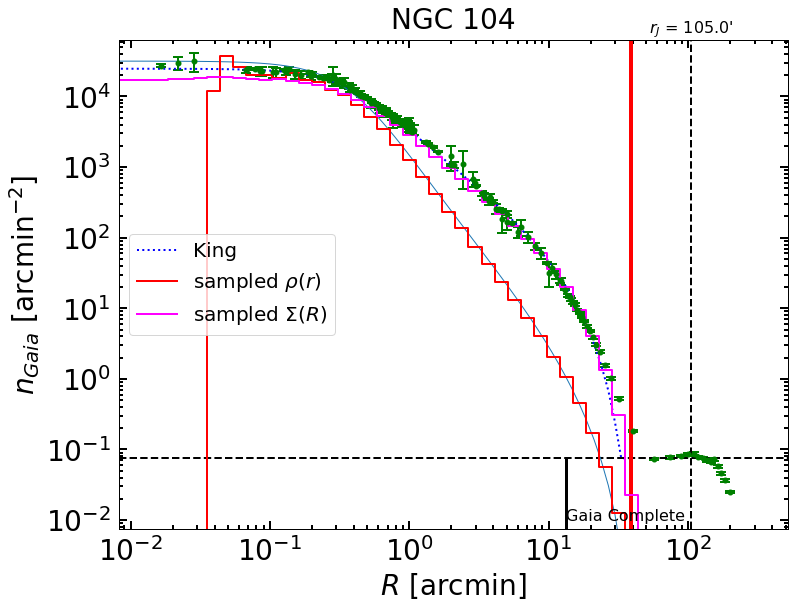

39.2418975848 40.1021707772


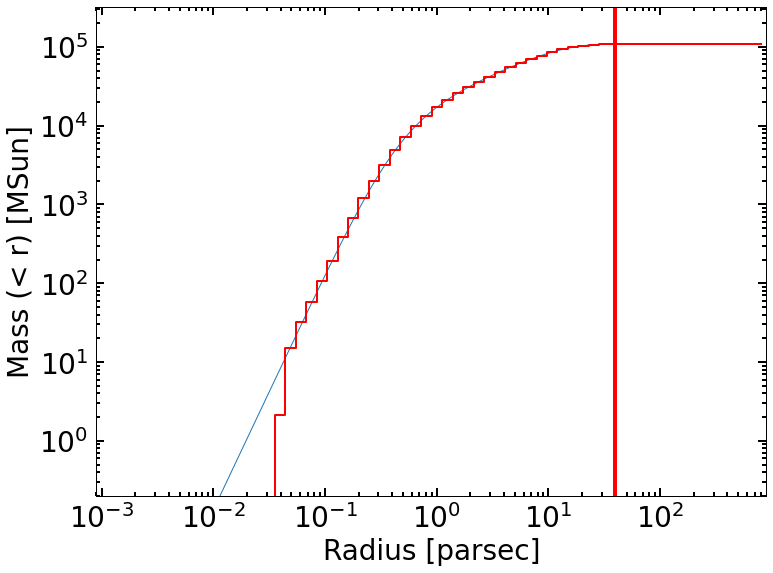

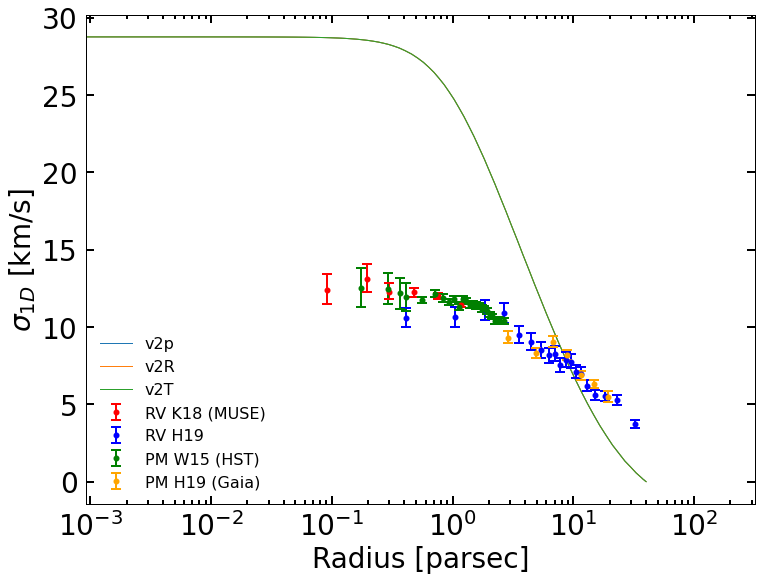

In [ ]:
outdir = "../out/"
for gc_name in ["NGC 104", "NGC 1261"]:
    # Sample and show projected star count profile
    sim = StarClusterSimulation(logger, gc_name)
    sim.sample_deBoer2019_bestfit_king(Nstars=50000)
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    sim.add_deBoer2019_to_fig(fig, show_King=True)
    sim.add_deBoer2019_sampled_to_ax(ax, parm="rho", Nbins=64)
    sim.add_deBoer2019_sampled_to_ax(ax, parm="Sigma", Nbins=64)
    ax.legend(fontsize=20)
    pyplot.savefig("{0}{1}_sampled.png".format(outdir, gc_name))
    pyplot.show(fig)

    # Mass
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    sim.add_deBoer2019_sampled_to_ax(ax, parm="mc", Nbins=64)
    pyplot.show(fig)


    # Velocity dispersion
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
    # v2, v2r, v2t : total, radial and tangential mean-square velocity
    # ax.plot(sim.king_model.r, sim.king_model.v2, label="v2")
    # ax.plot(sim.king_model.r, sim.king_model.v2r, label="v2r")
    # ax.plot(sim.king_model.r, sim.king_model.v2t, label="v2t")
    # v2R, v2T : radial and tangential component of mean-square velocity on plane of the sky
    ax.plot(sim.king_model.R, sim.king_model.v2p, label="v2p")
    ax.plot(sim.king_model.R, sim.king_model.v2R, label="v2R")
    ax.plot(sim.king_model.R, sim.king_model.v2T, label="v2T")
    # However, according to _project function
    # R is the projected (2d) distance from the center, Sigma is the
    # projected density, v2p is the line-of-sight velocity dispersion,
    # v2R and v2T are the radial and tangential velocity dispersion
    # components projected on the plane of the sky
    # --> What is the difference between the 'mean-square velocity' and 'velocity dispersion'?
    sim.add_H19_RVs_to_fig(fig)
    pyplot.show()